Jing Tong

In my part, I need to analysis the security of different neighborhoods in Pittsburgh. After that, I should find some neighborhoods with better police. Through the dat set I found, I determine the security of each neighborhood by the number of arrests recorded. So I could combine my data set with the rest of the group's data set to select the best neighborhoods in Pittsburgh.

First, I find a data set in the western Pennsylvania regional data center. This data set shows the Pittsburgh's record of arrests from 2016 to the present. And also, this data set provides the sex, race, time of arrest and location of the offender.It recorded 7,492 arrests. 

In [1]:
import pandas as pd
import geopandas
Arrest = pd.read_csv("Arrest in Pittsburgh.csv")
import matplotlib.pyplot as plt
Arrest.iloc[:,:]


,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,1983937,17068553,28.0,M,W,2017-04-16T15:47:00,"Francis ST & Centre AV Pittsburgh, PA 15219",903 Criminal Conspiracy. / 4304(a)(1) Endanger...,"Centre AV & Watt ST Pittsburgh, PA 15219",Middle Hill,2,501.0,6.0,3.0,-79.968396,40.446474
7488,1983938,17069098,21.0,F,B,2017-04-17T14:43:00,"East Hills DR & Wilner DR Pittsburgh, PA 15221",2702 Aggravated Assault. / 4304(a)(1) Endanger...,"2200 Block Wilner DR Pittsburgh, PA 15221",East Hills,5,1306.0,9.0,2.0,-79.866830,40.453388
7489,1983939,17068999,23.0,M,B,2017-04-17T11:20:00,"2100 Block Bedford AV Pittsburgh, PA 15219",2701 Simple Assault.,"2100 Block Bedford AV Pittsburgh, PA 15219",Bedford Dwellings,2,509.0,6.0,3.0,-79.980716,40.447045
7490,1983940,17068999,22.0,F,B,2017-04-17T11:20:00,"2100 Block Bedford AV Pittsburgh, PA 15219",2701 Simple Assault.,"2100 Block Bedford AV Pittsburgh, PA 15219",Bedford Dwellings,2,509.0,6.0,3.0,-79.980716,40.447045


In [2]:
Arrest.shape

(7492, 16)

Because the data is more, and many kinds we do not need to use，I separate out the neighborhoods where crime has occurred. then, I get the incidentneighborhood. hence, we can see exactly where the arrests are taking place.

In [3]:
import pandas as pd
Arrest = pd.read_csv("Arrest in Pittsburgh.csv")
import matplotlib.pyplot as plt
Arrest[['INCIDENTNEIGHBORHOOD']]

,INCIDENTNEIGHBORHOOD
0,Bloomfield
1,Outside City
2,Westwood
3,East Allegheny
4,Crafton Heights
...,...
7487,Middle Hill
7488,East Hills
7489,Bedford Dwellings
7490,Bedford Dwellings


This is the number of arrests recorded from highest to lowest in each neighborhood in Pittsburgh.The top five neighborhoods with the highest arrest rates are "South Side Flats", "Central Business District", "East Allegheny", "Carrick" and "East Liberty". The top five neighborhoods with the lowest arrest rates are "Mt. Oliver Neighborhood", "Swisshelm", "New Homestead", "Ridgemont" and "Chartiers City".

In [4]:
Arrest['INCIDENTNEIGHBORHOOD'].value_counts()


South Side Flats             482
Central Business District    369
East Allegheny               293
Carrick                      248
East Liberty                 197
                            ... 
Chartiers City                 5
Ridgemont                      4
New Homestead                  3
Swisshelm Park                 3
Mt. Oliver Neighborhood        2
Name: INCIDENTNEIGHBORHOOD, Length: 97, dtype: int64

Because the code above does not display all the data, I create a new csv called "incident neighborhood 2" to show all the data.

In [5]:
Arrest['INCIDENTNEIGHBORHOOD'].value_counts().to_csv('incident neighborhood 2.csv')

In [6]:
arresttotal = Arrest.groupby('INCIDENTNEIGHBORHOOD').count()['OFFENSES']
arresttotal.sort_values(ascending=True)

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood        2
New Homestead                  3
Swisshelm Park                 3
Ridgemont                      4
Chartiers City                 5
                            ... 
East Liberty                 197
Carrick                      248
East Allegheny               293
Central Business District    369
South Side Flats             482
Name: OFFENSES, Length: 97, dtype: int64

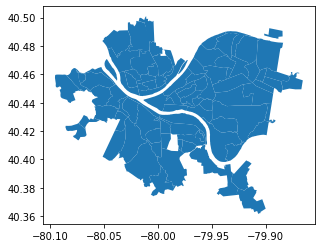

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot() 

In [8]:
arrest_map = neighborhoods.merge(arresttotal, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

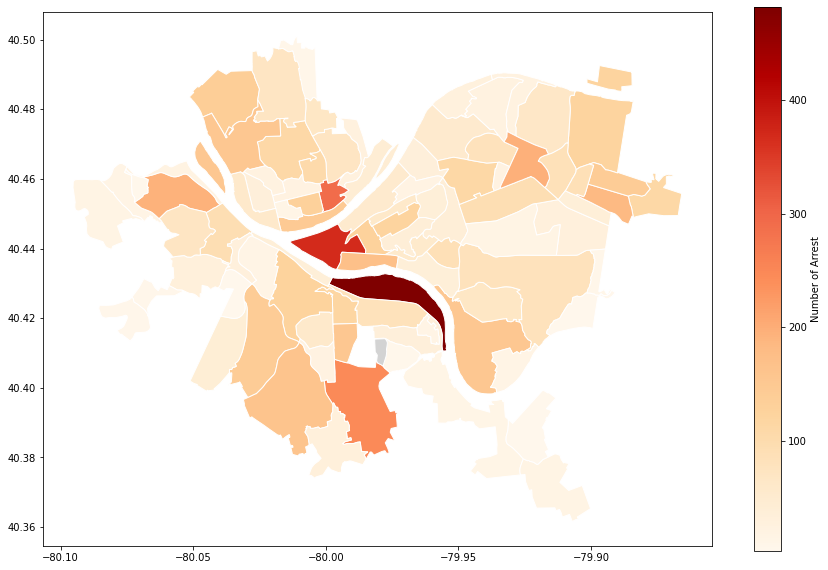

In [9]:
arrest_map.plot(column='OFFENSES', 
               cmap='OrRd',             
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Number of Arrest"}, 
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"} 
               )

Finally, I use a map of Pittsburgh to better illustrate the security situation in each neighborhood.The darker the color, the higher the crime rate. Conversely, lighter colors indicate lower crime rates in neighborhoods. Hence, you can see clearly on the map that there are some high crime neighborhoods on the north and south sides of Pittsburgh. And also, neighborhoods to the east and west of Pittsburgh are relatively safe.

Conclusion:

Through the data, the top five neighborhoods with the highest arrest rates in Pittsburgh are "South Side Flats", "Central Business District", "East Allegheny", "Carrick" and "East Liberty". The top five neighborhoods in Pittsburgh with the lowest arrest rates are "Mt. Oliver Neighborhood", "Swisshelm", "New Homestead", "Ridgemont" and "Chartiers City". 

I hadn't heard of these five communities, though they had the lowest crime rates. I think it's possible that these communities have a lower population that leads to less crime. So my data is one-dimensional, and it doesn't show you how good a neighborhood is, it just tells you how safe it is. 

I live on shadyside now, and the security of this neighborhood is not bad. There are also many large supermarkets here. Such as Target and Whole Foods. Hence, I think shadyside is the best neighborhood for me. However, the best neighborhood I found is Mt. Oliver Neighborhood with the lowest arrest rate. it may be the best in terms of policing, but in many ways it's not necessarily the best. 